In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Global plotting setups


# Update with preample specified in rcParams
#plt.rcParams.update(rcParams)

# Use LaTeX to render + specify font
plt.rc('text', usetex=False)
#plt.rc('font', **{'family': 'serif'})

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [3]:

data = pd.read_csv("log.csv", names=["T", "e", "P"])
data["T_set"] = 65 
data["t"] = np.linspace(0, len(data) * 5 / 60, len(data))
data.set_index("t", inplace=True)

data = data[13:45]

data["P"][data["P"] < 0] = 0
data["P"][(data["P"] < 500) & (data["P"] > 0)] = 500

<ipython-input-3-d9b369078e97>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["P"][(data["P"] < 500) & (data["P"] > 0)] = 500


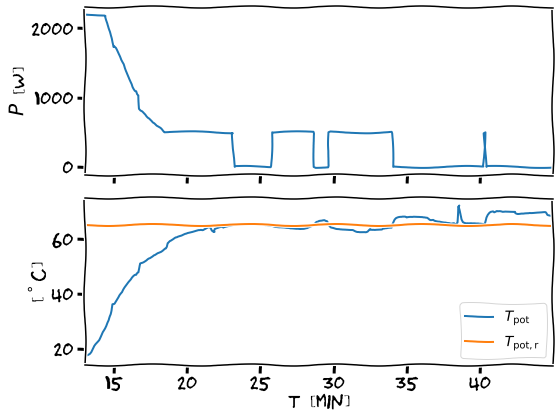

In [6]:
plt.xkcd()
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

ax[0].plot(data.index, data["P"])
ax[0].set_ylabel("$P$ [W]")
ax[0].grid()
ax[0].set_xlim([data.index[0], data.index[-1]])

ax[1].plot(data.index, data[["T", "T_set"]])
ax[1].set_ylabel("[$^\circ$C]")
ax[1].grid()
ax[1].set_xlim([data.index[0], data.index[-1]])
ax[1].legend(["$T_\mathrm{pot}$", "$T_\mathrm{pot,r}$"])

ax[1].set_xlabel("t [min]")
fig.tight_layout()
fig.savefig('mashout.pdf', bbox_inches='tight', pad_inches=0.01)